In [1]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ct

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.1 MB/s eta 0:00:00


Mögnunaröryggi: 2.00
 Fasaöryggi: 15.55
 omega_pi: 2.24
 omega_c: 1.55


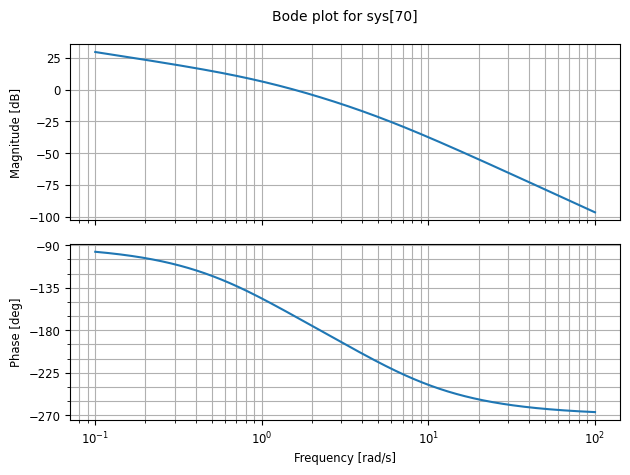

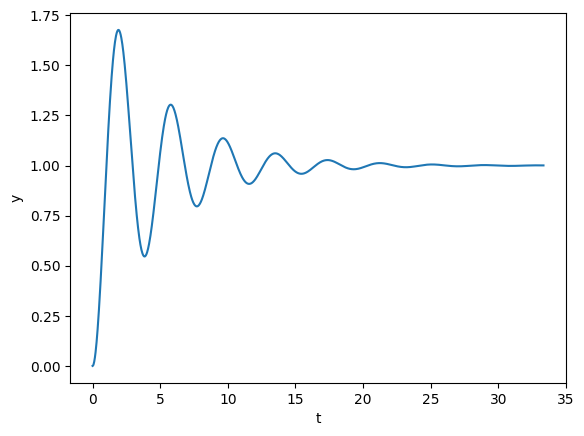

In [8]:
# Dæmi 17.8.4

K = 3
tau = 0.2

G_c = K
G_p = ct.tf([1],[1, 1, 0])
G_s = ct.tf([1], [tau, 1])

G_K = ct.series(G_c, G_p, G_s)

#print(G_K)

ct.bode(G_K, dB=True)
gm, pm, wcg, wcp = ct.margin(G_K)
print("Mögnunaröryggi: %4.2f\n Fasaöryggi: %4.2f\n omega_pi: %4.2f\n omega_c: %4.2f" % (gm,pm,wcg,wcp))

G_RY = ct.feedback(ct.series(G_c,G_p),G_s)

plt.figure()
t,y = ct.step_response(G_RY)
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

<TransferFunction>: sys[79]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     15
  --------
  10 s + 1
<TransferFunction>: sys[81]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  10 s + 1
  ---------
  10 s + 16


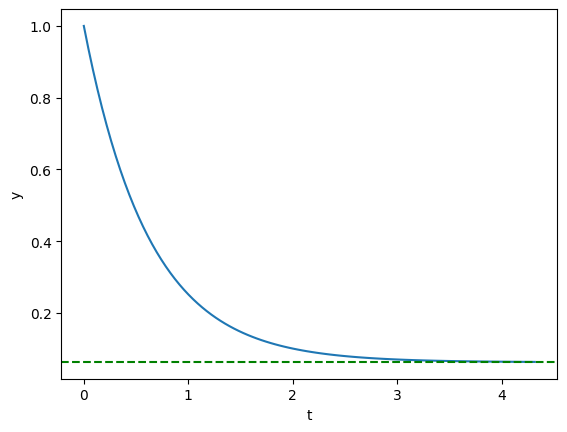

In [9]:
# Dæmi 17.8.6 - þrepabreyting í R

G_c = 5
G_p = ct.tf([3],[10,1])
G_K = G_c * G_p

print(G_K)

G_RE = ct.feedback(1,G_K)

print(G_RE)

t,y = ct.step_response(G_RE)
plt.plot(t,y)
plt.axhline(y=1/16.0, color='g', ls='--')
plt.xlabel('t')
plt.ylabel('y')
plt.show()



<TransferFunction>: sys[87]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     -3
  ---------
  10 s + 16


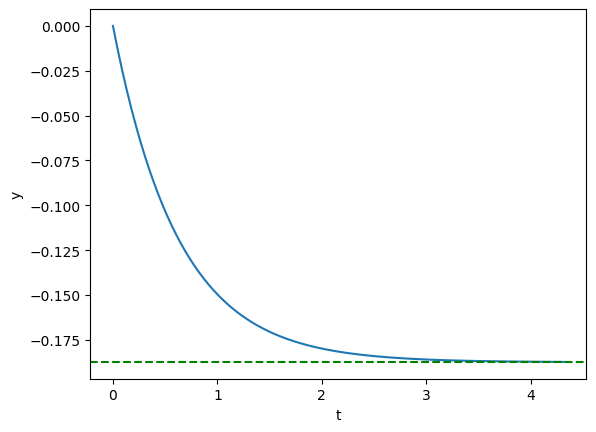

In [ ]:
# Dæmi 17.8.6 - þrepabreyting í V

G_VE = ct.feedback(-G_p,-G_c)

print(G_VE)

t,y = ct.step_response(G_VE)
plt.plot(t,y)
plt.axhline(y=-3/16.0, color='g', ls='--')
plt.xlabel('t')
plt.ylabel('y')
plt.show()



In [10]:
# Dæmi 17.8.7 - án afturvirkni

G_c = 3
G_p = ct.tf([2],[1,2,1])

mag, phase, omega_out = ct.frequency_response(G_p, [0.5])

print("Jafnvægisgildi truflunar: ", 2.5 * mag)



Jafnvægisgildi truflunar:  [4.]


In [ ]:
# Dæmi 17.8.7 - með afturvirkni

G_VY = ct.feedback(G_p,G_c)

mag, phase, omega_out = ct.frequency_response(G_VY, [0.5])

print("Jafnvægisgildi truflunar: ", 2.5 * mag)

Jafnvægisgildi truflunar:  [0.73274331]
